#IMPORT THE DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import datetime
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt, numpy as np
import plotly.express as px


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/DataMining/data.csv", encoding = 'utf-8')

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,MntFruits,MntMeatProducts,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,88,546,7
1,2174,1954,Graduation,Single,46344.0,1,1,6,5
2,4141,1965,Graduation,Together,71613.0,0,49,127,4
3,6182,1984,Graduation,Together,26646.0,1,4,20,6
4,5324,1981,PhD,Married,58293.0,1,43,118,5




# 1. Data Cleaning

##1.1 Check missing value

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2216 non-null   float64
 5   Kidhome            2240 non-null   int64  
 6   MntFruits          2240 non-null   int64  
 7   MntMeatProducts    2240 non-null   int64  
 8   NumWebVisitsMonth  2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

## 1.2. CLEANING

Because there are 2216 non-null values and 2240 total rows, so there are 2240 - 2216 = 24 missing values in this column. So we have to eliminate missing values.

In [ ]:
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [ ]:
data.drop(columns=['ID'], axis=1, inplace=True)
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,MntFruits,MntMeatProducts,NumWebVisitsMonth
0,1957,Graduation,Single,58138.0,0,88,546,7
1,1954,Graduation,Single,46344.0,1,1,6,5
2,1965,Graduation,Together,71613.0,0,49,127,4
3,1984,Graduation,Together,26646.0,1,4,20,6
4,1981,PhD,Married,58293.0,1,43,118,5
...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,43,182,5
2236,1946,PhD,Together,64014.0,2,0,30,7
2237,1981,Graduation,Divorced,56981.0,0,48,217,6
2238,1956,Master,Together,69245.0,0,30,214,3


# 2. Univariate analysis

## 2.1 Education

In [ ]:
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


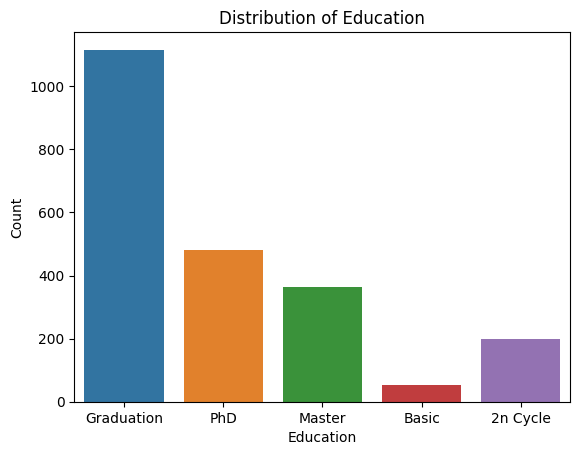

In [ ]:
sns.countplot(x='Education', data=data)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

The number of postgraduates is greater than the number of undergraduates. Specifically:

*   Graduation: more than 1000
*   PhD: more than 400

*   Master : more than 300
*   2n Cycle: more than 200
*   Basic: about 100-150







## 2.2 Marital Status

In [ ]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



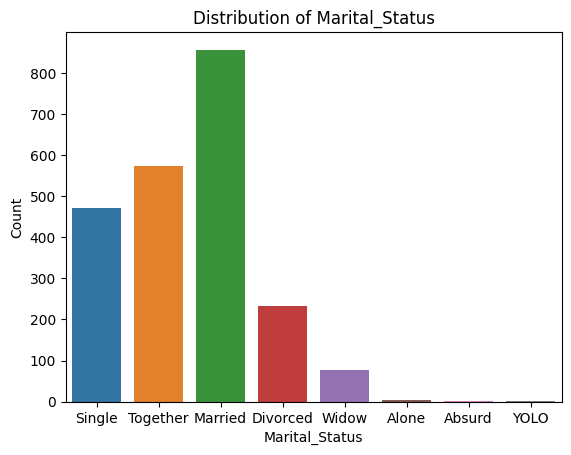

In [ ]:
sns.countplot(x='Marital_Status', data=data)
plt.title('Distribution of Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.show()

People who live together are in a relationship more than people who live alone. Specifically:
- Married     857
- Together    573
- Single      471
- Divorced    232
- Widow        76
- Alone         3
- Absurd        2
- YOLO  2

## 2.3 Children

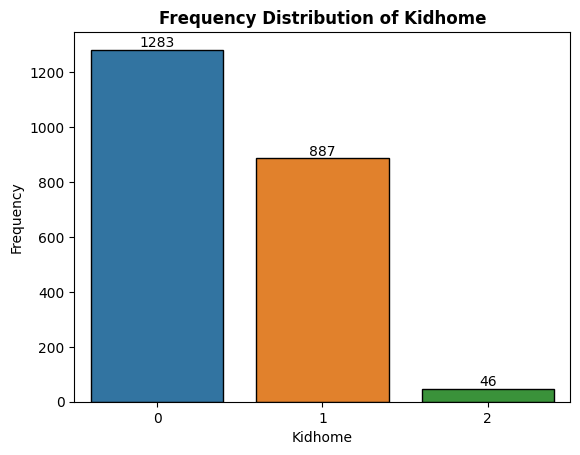

In [ ]:
ax = sns.countplot(data=data, x="Kidhome", edgecolor="black",
                   order = data['Kidhome'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Frequency Distribution of Kidhome", weight="bold")
plt.xlabel("Kidhome")
plt.ylabel("Frequency")
plt.show()

Families with children (1 or 2) have fewer children than families without children
- One child: 886
- 2 child: 46
- No child: 1283

##2.4 Age

In [ ]:
data["Age"] = 2023-data["Year_Birth"]

In [ ]:
print(data["Age"])

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2216, dtype: int64


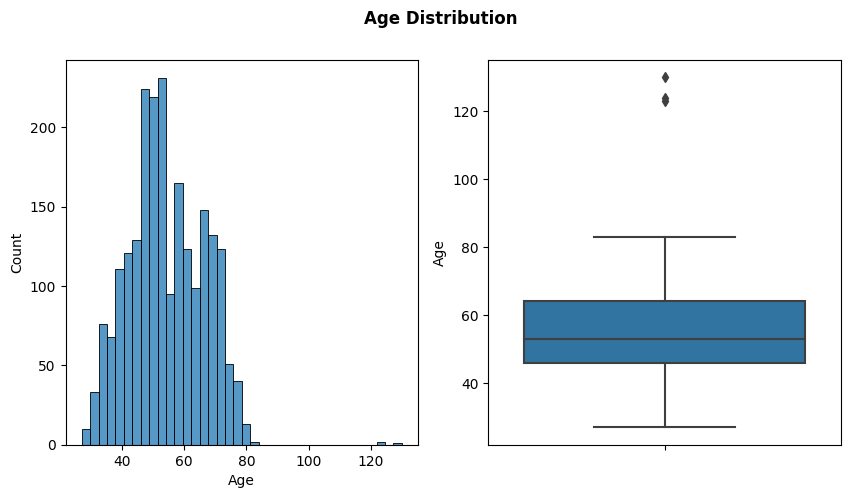

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.histplot(ax=ax[0], data=data, x="Age")
sns.boxplot(ax=ax[1], data=data, y="Age")
fig.suptitle('Age Distribution', weight="bold")
plt.show()

The maximum age ranges from 30-60 and there are exceptions such as over 120

##2.5 Income

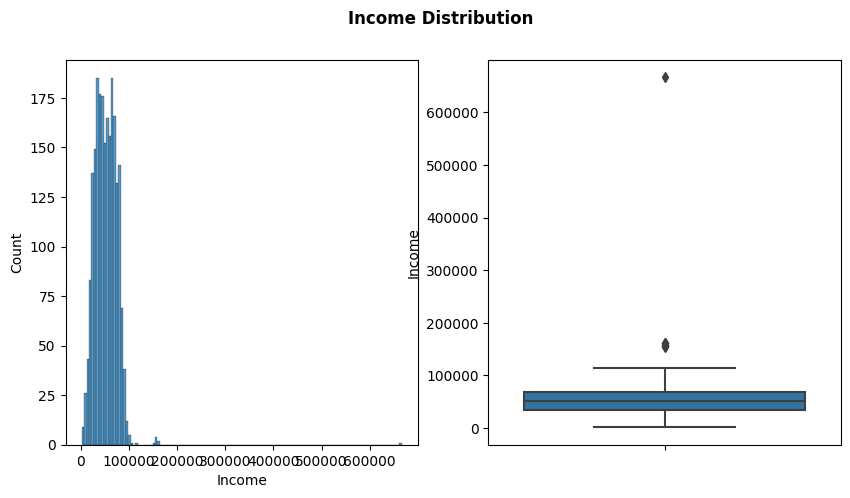

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.histplot(ax=ax[0], data=data, x="Income")
sns.boxplot(ax=ax[1], data=data, y="Income")
fig.suptitle('Income Distribution', weight="bold")
plt.show()

Income ranges from about 25000-75000 and there are exceptions like above 150000

## 2.6 Product

In [ ]:
products = data[['MntFruits', 'MntMeatProducts']]
products.describe()

,MntFruits,MntMeatProducts
count,2216.000000,2216.000000
mean,26.356047,166.995939
std,39.793917,224.283273
min,0.000000,0.000000
25%,2.000000,16.000000
50%,8.000000,68.000000
75%,33.000000,232.250000
max,199.000000,1725.000000


In [ ]:
data[['MntFruits', 'MntMeatProducts']].sum()

MntFruits           58405
MntMeatProducts    370063
dtype: int64

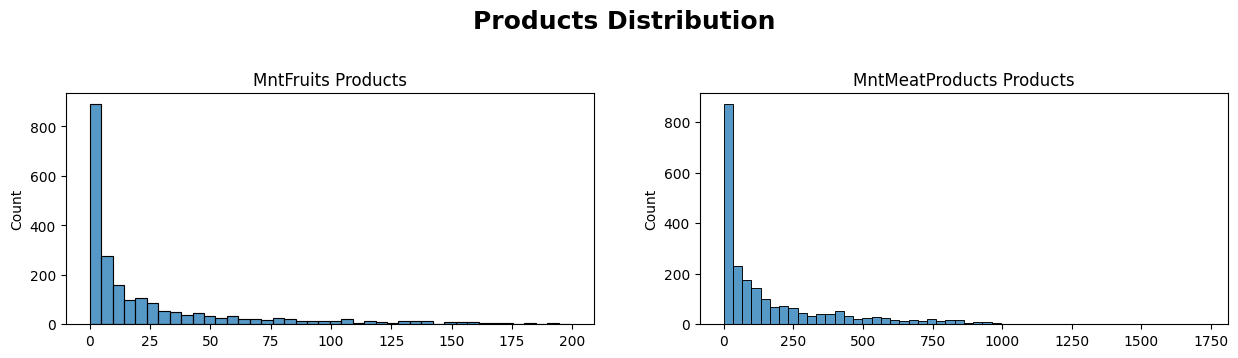

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Products Distribution ", fontsize=18, y=0.95, weight="bold")



for i, product in enumerate(products.columns.tolist()):

    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    sns.histplot(ax=ax, data=products, x=products[product])

    # chart formatting
    ax.set_title(f"{product} Products")
    ax.set_xlabel("")

plt.show()

The level of meat purchases is higher than the level of fruit purchases

##2.7 Web purchase

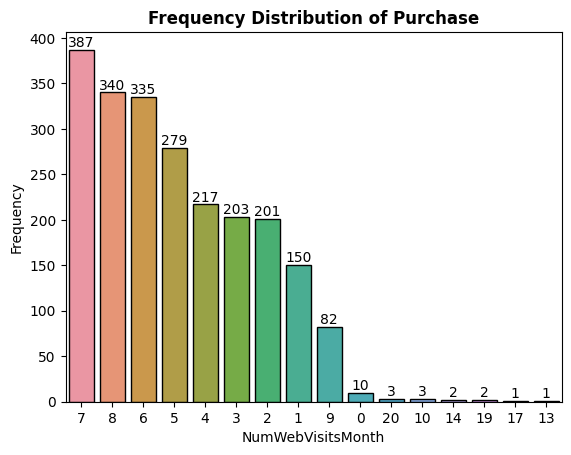

In [ ]:
ax = sns.countplot(data=data, x="NumWebVisitsMonth", edgecolor="black",
                   order = data['NumWebVisitsMonth'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Frequency Distribution of Purchase", weight="bold")
plt.xlabel("NumWebVisitsMonth")
plt.ylabel("Frequency")
plt.show()

The highest level of online purchases is 2-7 times per month

#3. Bivariate analysis

## 3.1 Check outlier

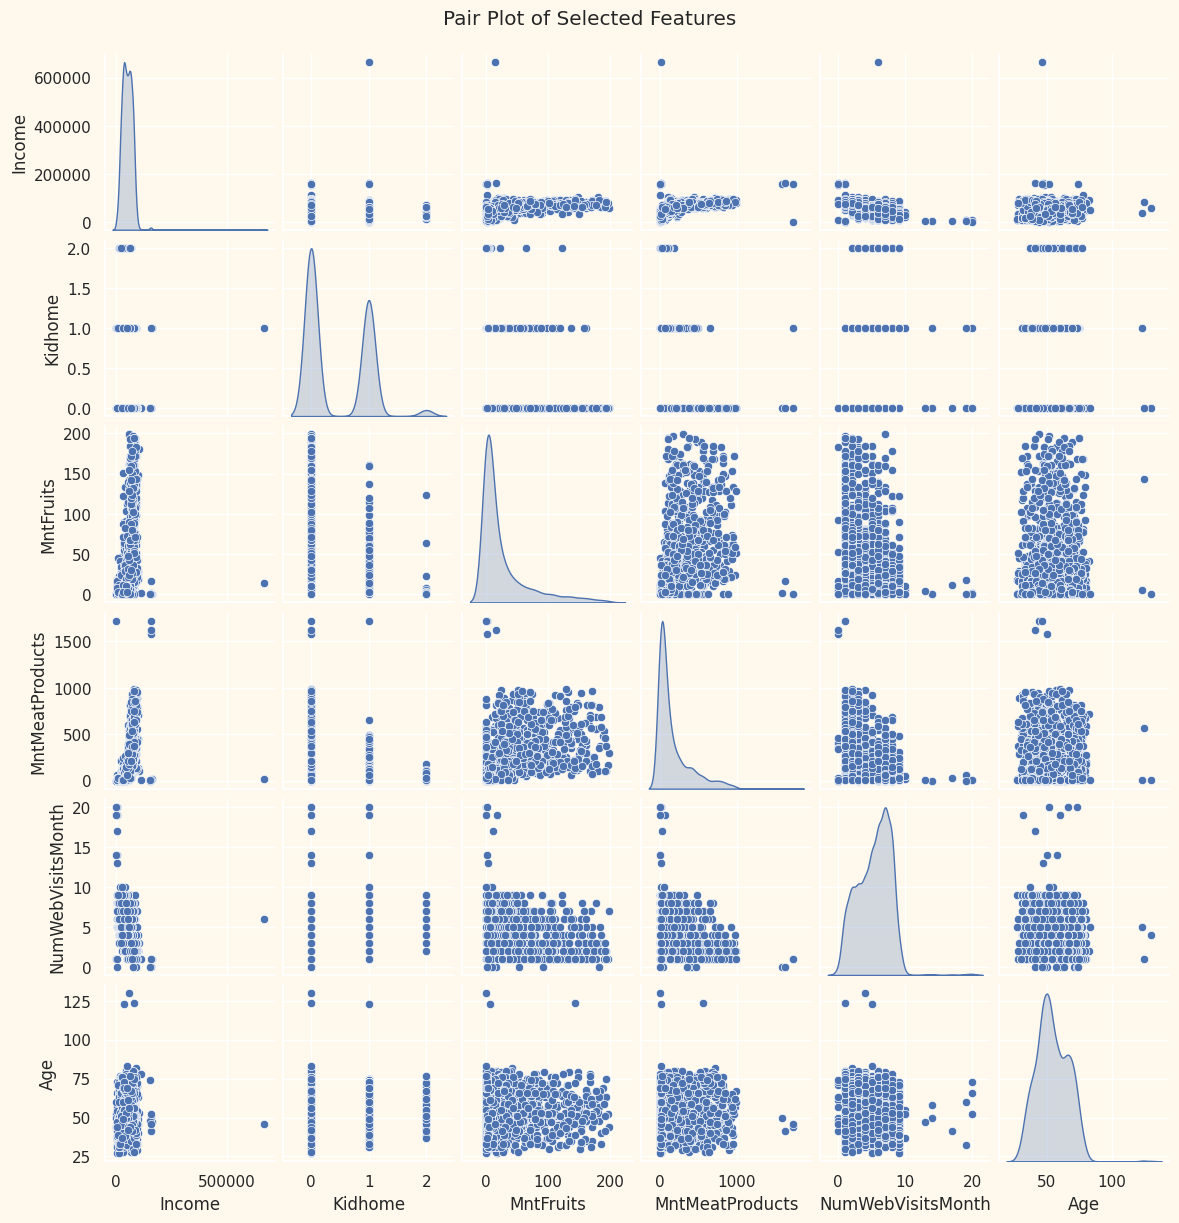

In [ ]:
# Select features to draw pair plot
selected_features = ["Income", "Kidhome", "MntFruits", "MntMeatProducts", "NumWebVisitsMonth", "Age","Education","Marital_Status"]

# Create pair plot
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
sns.pairplot(data[selected_features], height=2, diag_kind="kde")
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

Clearly, there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.

In [ ]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


## 3.1 Correlation matrix

<ipython-input-22-336055ece5fa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_without_Year_Birth.corr()


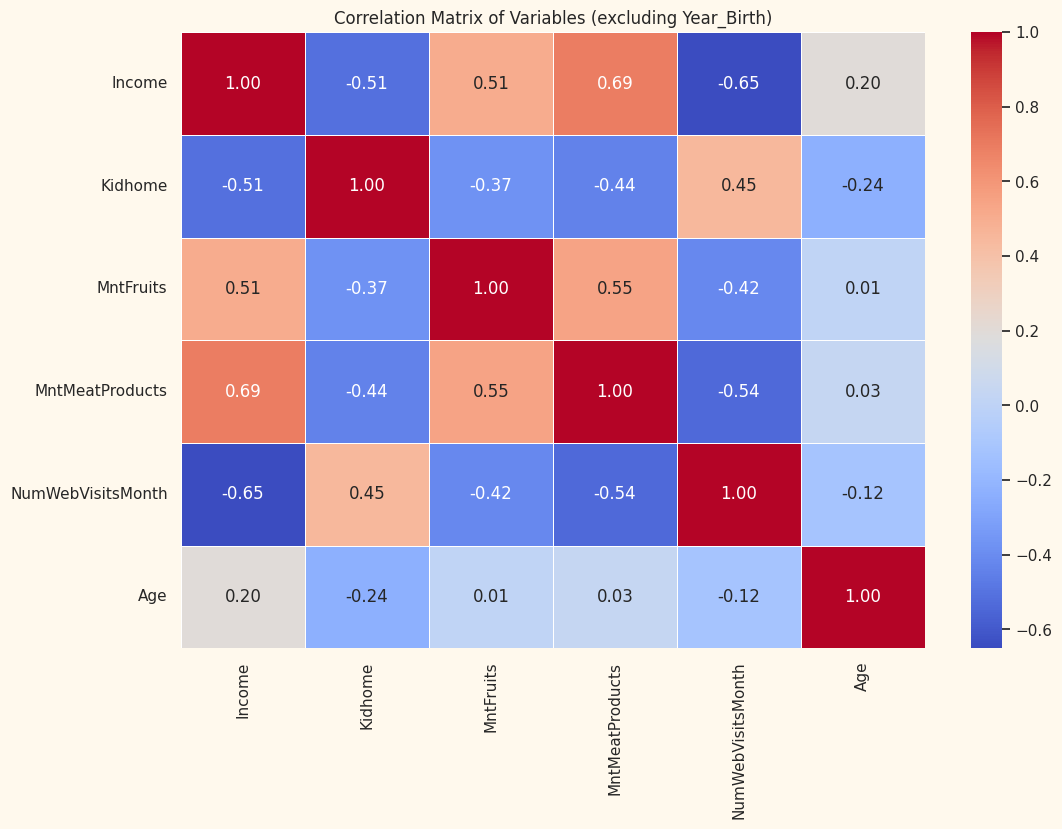

In [ ]:
data_without_Year_Birth = data.drop('Year_Birth', axis=1)
# Calculate the correlation matrix for the remaining variables
correlation_matrix = data_without_Year_Birth.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Variables (excluding Year_Birth)')
plt.show()

The correlation matrix shows high correlation between variables.
Specifically:
- Income has a high correlation with MntFruits (0.51)
- Income vs MntMeatProduct( 0.69)

......

You will clearly see the relationship between them below

## 3.2 Relationship between Income & Product

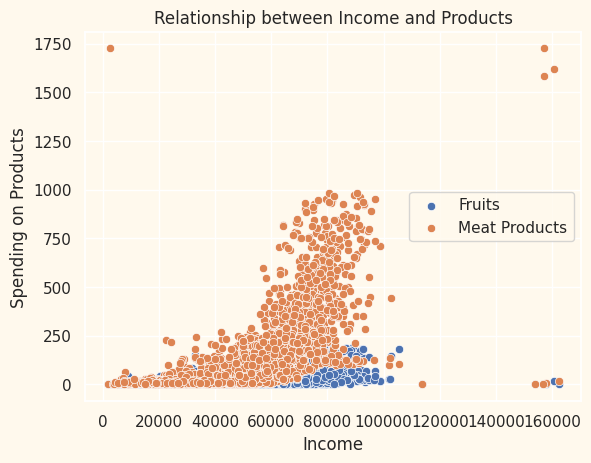

In [ ]:
products = data[['MntFruits', 'MntMeatProducts']]

sns.scatterplot(data=data, x='Income', y='MntFruits', label='Fruits')
sns.scatterplot(data=data, x='Income', y='MntMeatProducts', label='Meat Products')

plt.title("Relationship between Income and Products")
plt.xlabel("Income")
plt.ylabel("Spending on Products")
plt.legend()
plt.show()

The higher the income, the more likely it is to buy products such as meat and fruit

# **4. Model**

##K-**Mean**

In [ ]:
selected_features = ['Year_Birth', 'Income', 'Kidhome', 'MntFruits', 'MntMeatProducts', 'NumWebVisitsMonth']

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[selected_features])

In [ ]:
num_clusters = 3

In [ ]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
data['Cluster'] = kmeans.labels_
data_cleaned = data.copy()

In [ ]:
print(kmeans.cluster_centers_)

[[ 0.02013158  1.17103504 -0.74042096  1.20207062  1.36511553 -1.08333398]
 [ 0.38998237 -0.74956819  1.02415083 -0.50214006 -0.58015269  0.61840314]
 [-0.51660944  0.09311302 -0.76661513 -0.24823948 -0.26917035  0.01036959]]


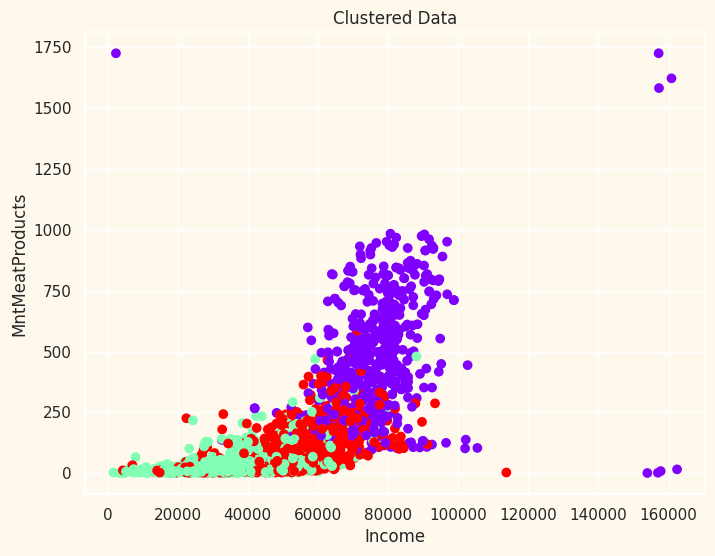

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['Income'], data_cleaned['MntMeatProducts'], c=data_cleaned['Cluster'], cmap='rainbow')
plt.xlabel('Income')
plt.ylabel('MntMeatProducts')
plt.title('Clustered Data')
plt.show()

In [ ]:
cluster_counts = data_cleaned['Cluster'].value_counts()

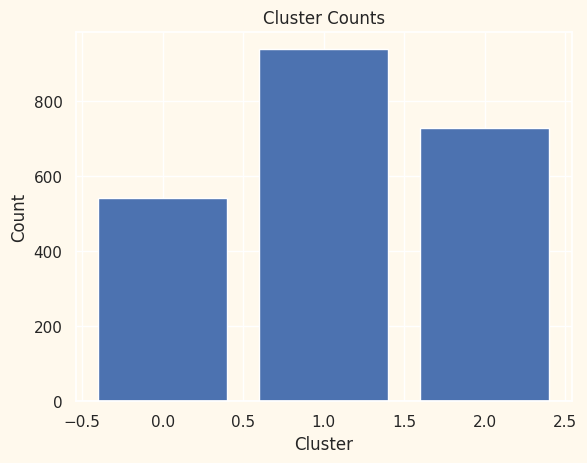

In [ ]:
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Counts')
plt.show()

In [ ]:
data_cleaned["Age"] = 2023-data_cleaned["Year_Birth"]

data_cleaned["Spent"] =  data_cleaned["MntFruits"]+ data_cleaned["MntMeatProducts"]

data_cleaned["Living_With"]=data_cleaned["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

data_cleaned["Children"]=data_cleaned["Kidhome"]

data_cleaned["Family_Size"] = data_cleaned["Living_With"].replace({"Alone": 1, "Partner":2})

data_cleaned["Education"]=data_cleaned["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

data=data.rename(columns={"MntFruits":"Fruits","MntMeatProducts":"Meat"})

to_drop = ["Marital_Status", "Year_Birth"]
data_cleaned = data_cleaned.drop(to_drop, axis=1)

In [ ]:
data_cleaned.head()

,Education,Income,Kidhome,MntFruits,MntMeatProducts,NumWebVisitsMonth,Age,Cluster,Spent,Living_With,Children,Family_Size
0,Graduate,58138.0,0,88,546,7,66,0,634,Alone,0,1
1,Graduate,46344.0,1,1,6,5,69,1,7,Alone,1,1
2,Graduate,71613.0,0,49,127,4,58,2,176,Partner,0,2
3,Graduate,26646.0,1,4,20,6,39,1,24,Partner,1,2
4,Postgraduate,58293.0,1,43,118,5,42,1,161,Partner,1,2


<ipython-input-36-42342c541cd4>:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  pl = sns.scatterplot(data = data_cleaned,x=data_cleaned["Spent"], y=data_cleaned["Income"],hue=data_cleaned["Cluster"], palette= pal)


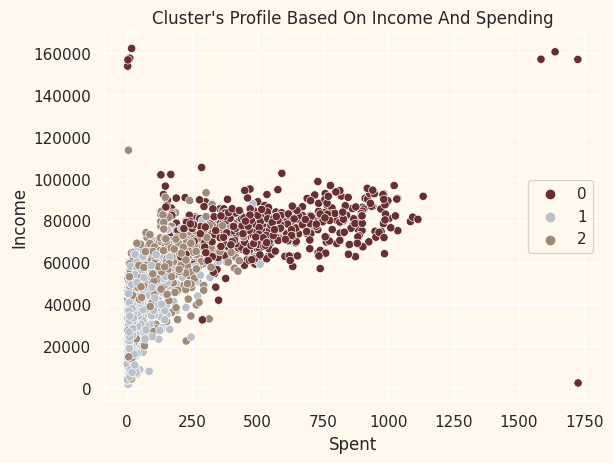

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

pl = sns.scatterplot(data = data_cleaned,x=data_cleaned["Spent"], y=data_cleaned["Income"],hue=data_cleaned["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 640x480 with 0 Axes>

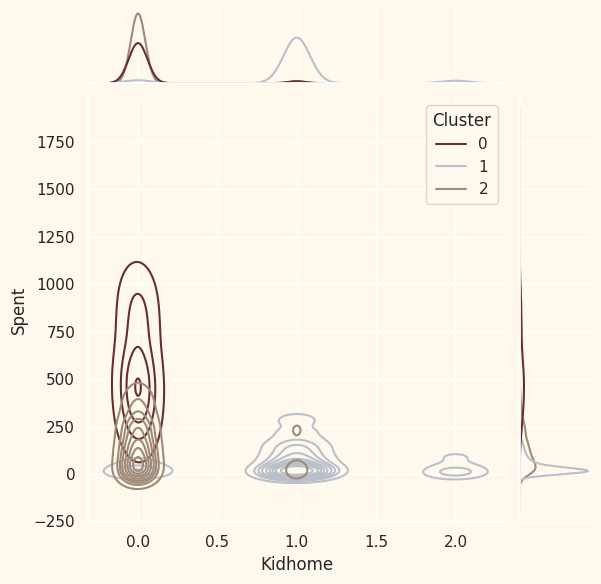

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 640x480 with 0 Axes>

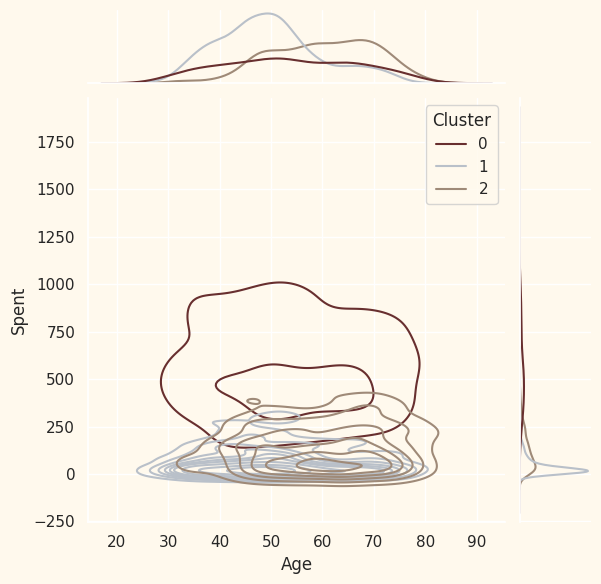

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 640x480 with 0 Axes>

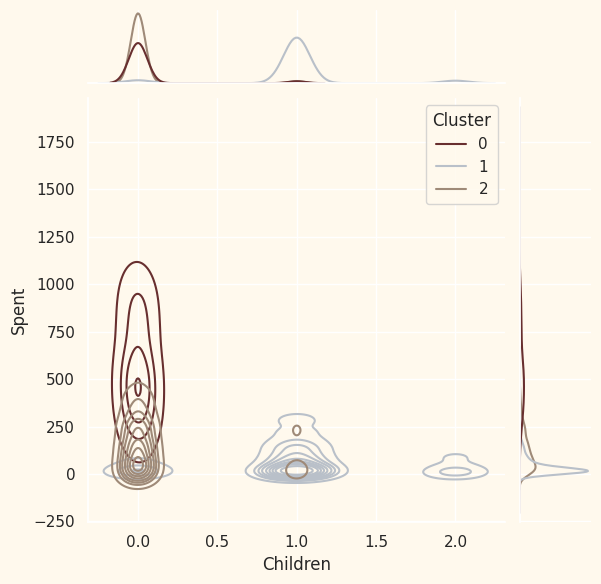

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 640x480 with 0 Axes>

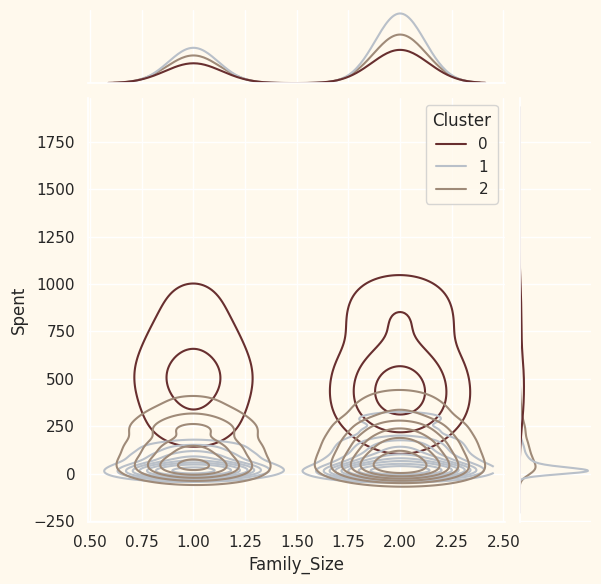

Ignoring Education as it is not a numeric variable.
Ignoring Living_With as it is not a numeric variable.


In [ ]:
Personal = ["Kidhome", "Age", "Children", "Family_Size", "Education", "Living_With"]

for i in Personal:
    # Kiểm tra xem biến có phải là kiểu số hoặc ngày tháng không
    if data_cleaned[i].dtype in ['int64', 'float64']:
        plt.figure()
        sns.jointplot(x=data_cleaned[i], y=data_cleaned["Spent"], hue=data_cleaned["Cluster"], kind="kde", palette=pal)
        plt.show()
    else:
        print(f"Ignoring {i} as it is not a numeric variable.")

## Gaussian Mixture







2    941
0    931
1    340
Name: Cluster, dtype: int64


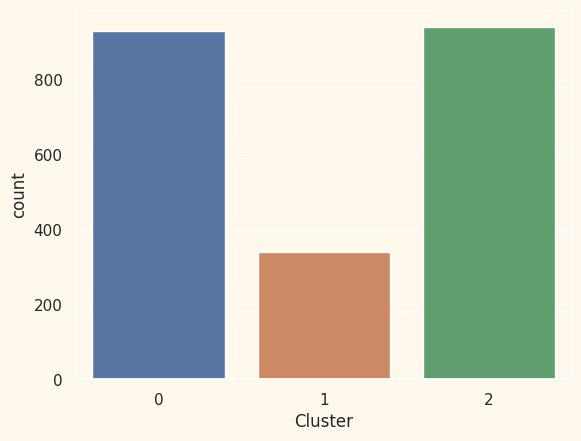

In [ ]:
# Giả sử 'data' là DataFrame của bạn với các đặc trưng đã chọn
selected_features = ['Year_Birth', 'Income', 'Kidhome', 'NumWebVisitsMonth']
selected_data = data[selected_features]

# Xử lý giá trị NaN bằng giá trung bình của cột
imputer = SimpleImputer(strategy='mean')
selected_data_imputed = pd.DataFrame(imputer.fit_transform(selected_data), columns=selected_data.columns)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
selected_data_scaled = pd.DataFrame(scaler.fit_transform(selected_data_imputed), columns=selected_data_imputed.columns)

# Sử dụng GaussianMixture để phân cụm dữ liệu
gmm = GaussianMixture(n_components=3, random_state=42)
labels = gmm.fit_predict(selected_data_scaled)

# Thêm nhãn cụm vào DataFrame gốc
data['Cluster'] = labels

# Hiển thị thông tin về kích thước của mỗi cụm
print(data['Cluster'].value_counts())

# Hiển thị phân phối của các cụm
sns.countplot(x='Cluster', data=data)
plt.show()


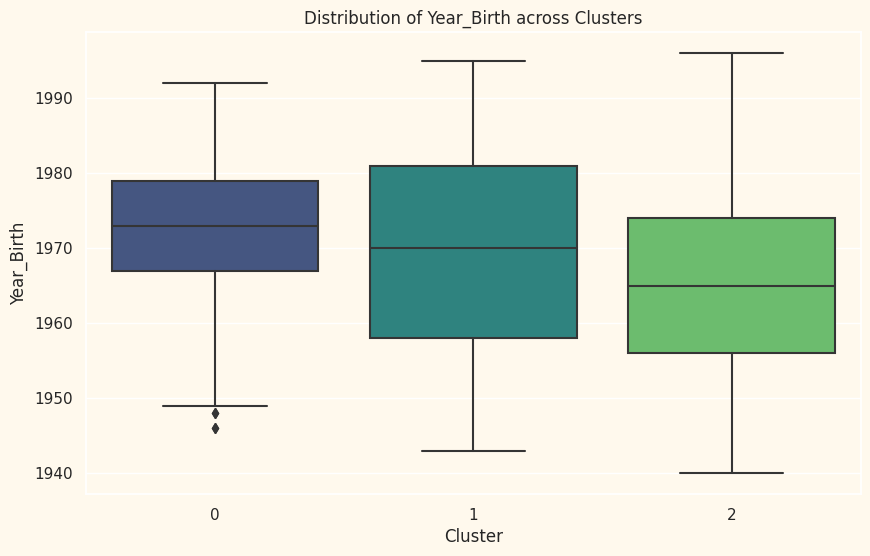

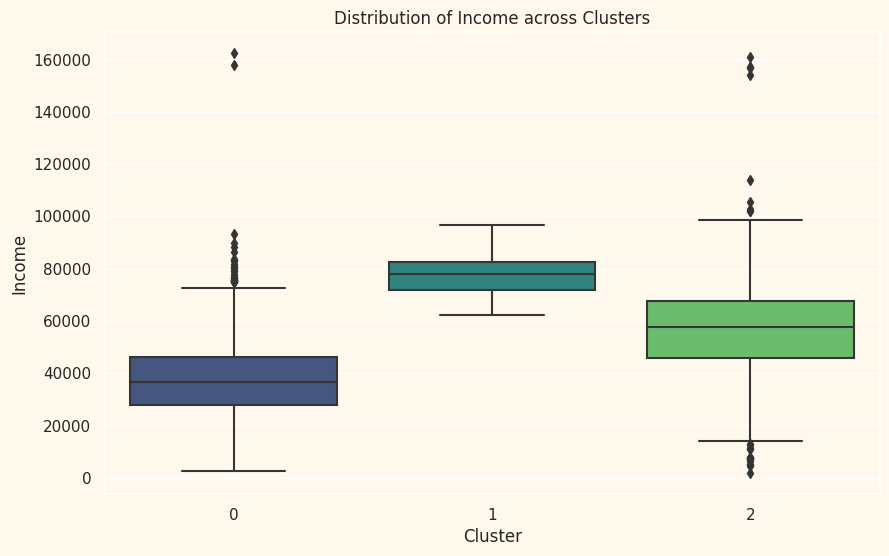

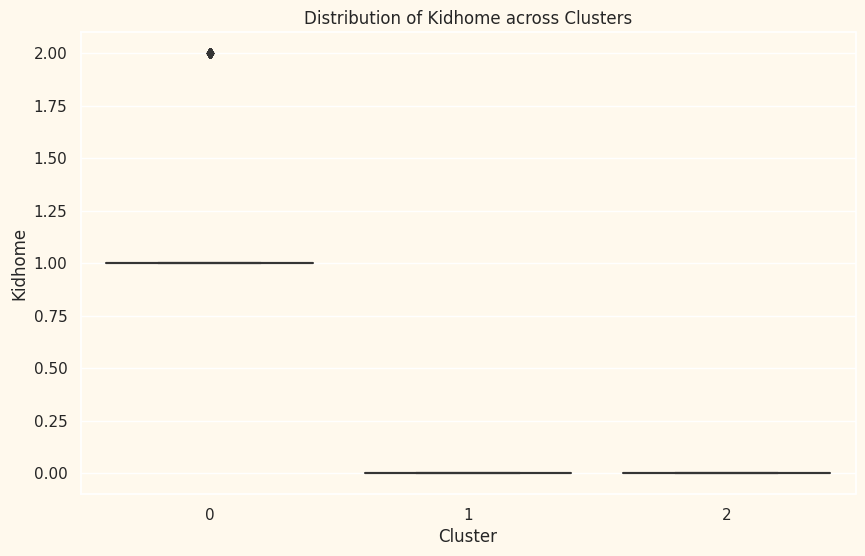

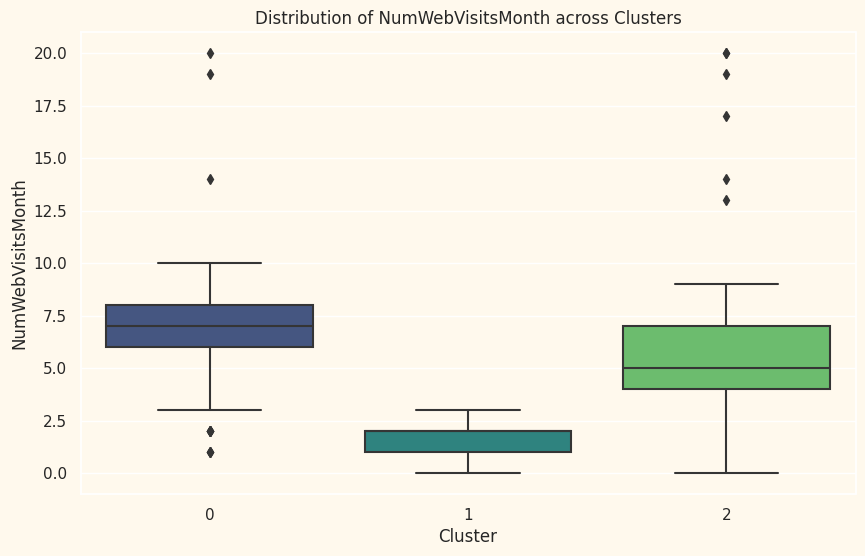

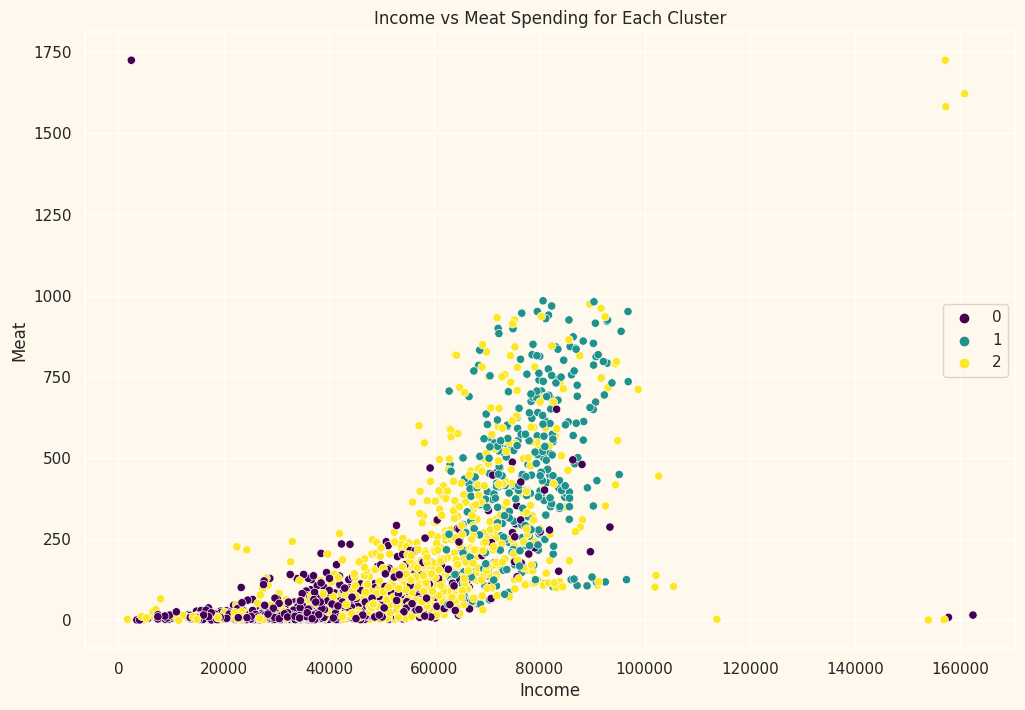


Cluster 0 Description:
         Year_Birth   Education Marital_Status         Income     Kidhome  \
count    931.000000         931            931     931.000000  931.000000   
unique          NaN           5              6            NaN         NaN   
top             NaN  Graduation        Married            NaN         NaN   
freq            NaN         468            369            NaN         NaN   
mean    1972.514501         NaN            NaN   38467.287863    1.049409   
std        9.967720         NaN            NaN   16028.011044    0.216837   
min     1946.000000         NaN            NaN    2447.000000    1.000000   
25%     1967.000000         NaN            NaN   27930.000000    1.000000   
50%     1973.000000         NaN            NaN   36781.000000    1.000000   
75%     1979.000000         NaN            NaN   46169.000000    1.000000   
max     1992.000000         NaN            NaN  162397.000000    2.000000   

            Fruits         Meat  NumWebVisitsMonth 

In [ ]:
# Rename the 'Spent' column in the 'data' DataFrame
data = data.rename(columns={"MntFruits": "Fruits", "MntMeatProducts": "Meat"})

# Biểu đồ phân phối của các đặc trưng theo cụm
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.title(f'Distribution of {feature} across Clusters')
    plt.show()

# Biểu đồ phân phối thu chi theo cụm
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Meat', hue='Cluster', data=data, palette='viridis')
plt.xlabel('Income')
plt.ylabel('Meat')
plt.title('Income vs Meat Spending for Each Cluster')
plt.legend()
plt.show()

# Mô tả chi tiết cho từng cụm
for cluster in range(len(cluster_counts)):
    cluster_data = data[data['Cluster'] == cluster]
    cluster_description = cluster_data.describe(include='all')
    print(f"\nCluster {cluster} Description:")
    print(cluster_description)

##Hierarchical Clustering

In [ ]:
selected_features = ['Income', 'Fruits', 'Meat']
data_cleaned = data[selected_features].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

In [ ]:
# Sử dụng phương pháp liên kết ward để xây dựng cây phân cấp
linkage_matrix = linkage(scaled_data, method='ward')

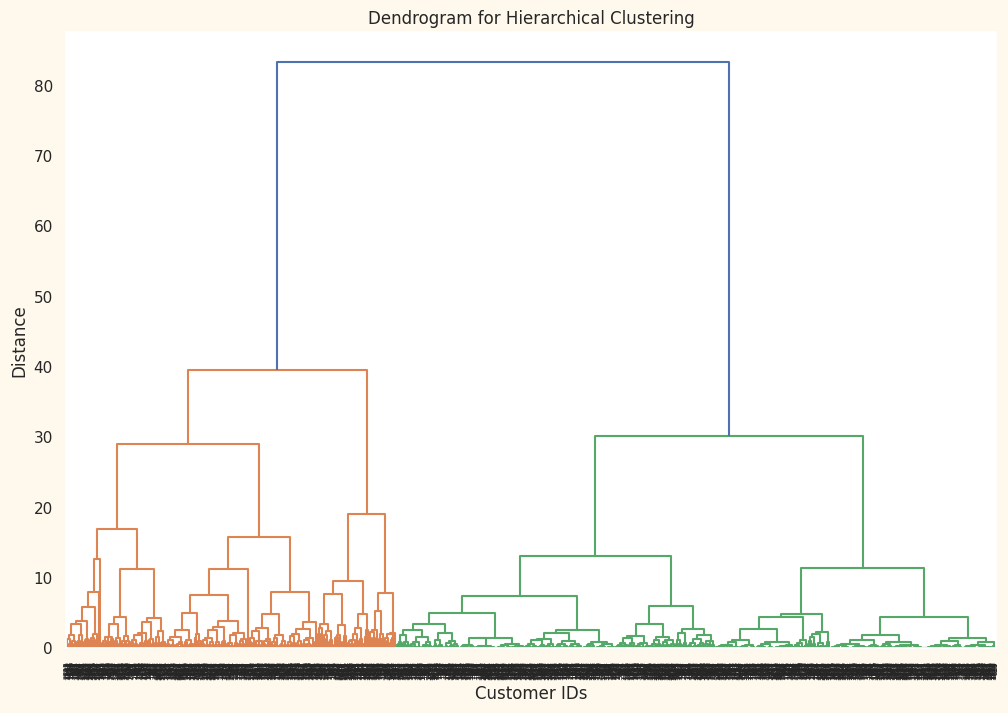

In [ ]:
# Vẽ biểu đồ dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation="top", labels=data_cleaned.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer IDs')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Xác định số lượng cụm dựa trên đồ thị dendrogram
num_clusters = 3  # Chọn số cụm dựa trên cấp cắt trên dendrogram
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [ ]:
# Thêm nhãn cụm vào DataFrame
data_cleaned['Cluster'] = clusters

In [ ]:
# Hiển thị thông tin về kích thước của mỗi cụm
print(data_cleaned['Cluster'].value_counts())

1    1427
3     598
2     187
Name: Cluster, dtype: int64


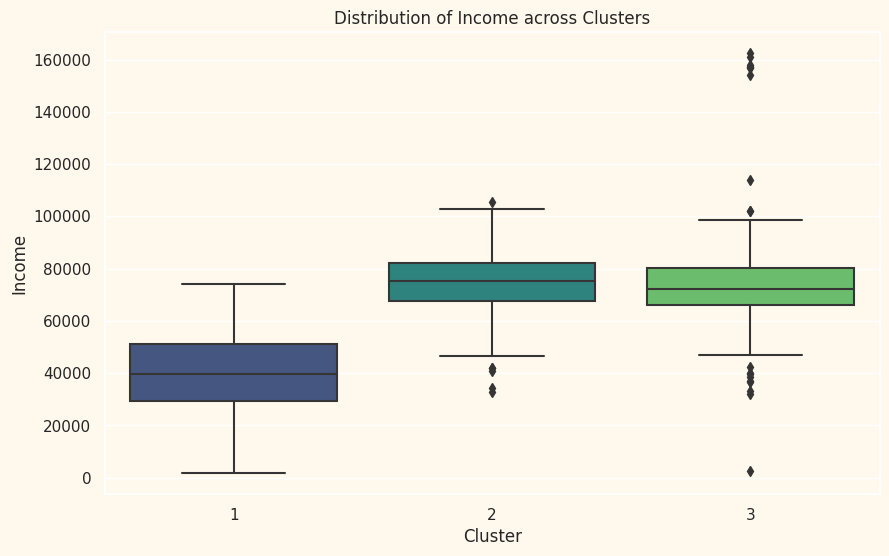

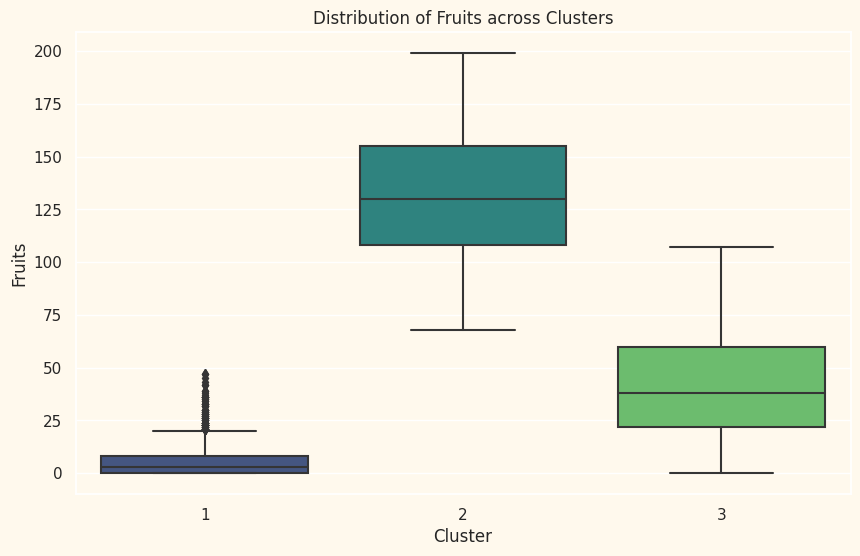

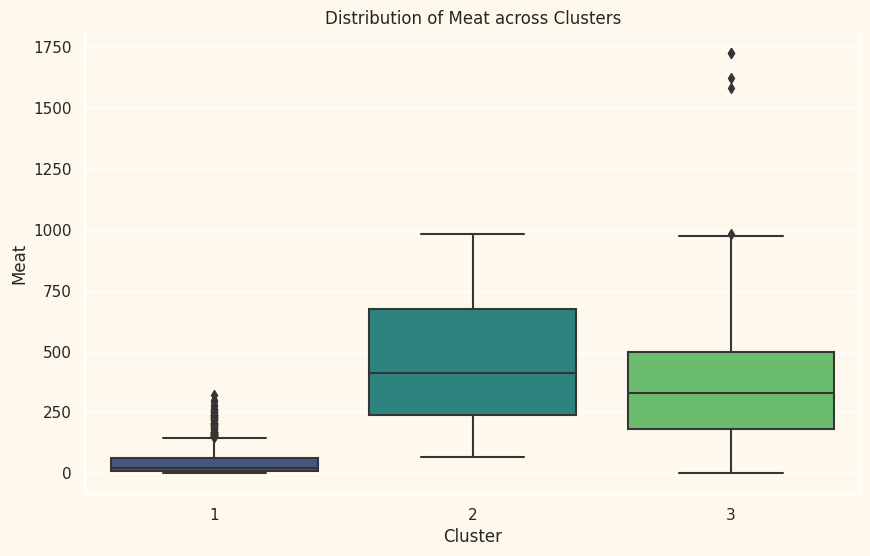

In [ ]:
# Biểu đồ phân phối của các đặc trưng theo cụm
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=data_cleaned, palette='viridis')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.title(f'Distribution of {feature} across Clusters')
    plt.show()